# EDA

In [1]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
import pybingmaps
bing = pybingmaps.Bing('AizoCiuRwxjT9SjxftwCItVoRXI2v0V3UnLTKSebigC5GUW5NklrIZpL5jRANFuJ')

In [2]:
#Inicializacion de variables de tu posicion
my_latitude =20.677041
my_longuitud =-103.347745
my_location = (my_latitude, my_longuitud)
np_my_location_arr = np.array([my_latitude,my_longuitud])
df_my_location = pd.DataFrame({'Latitud': [my_latitude],'Longuitud': [my_longuitud]})
#np_my_location_arr

In [3]:
#Importando los datos y convirtiendolo en un dataframe
df_Hospitals = pd.read_excel("./Master_Dataset_AI_Saturday.xlsx")
#print(df_Hospitals)

In [4]:
#Verificar cuantos datos hay nulos
#coordinates_df.isnull().sum()

In [5]:
#Informacion General del dataframe
#df_Hospitals.describe()

<Figure size 3600x0 with 0 Axes>

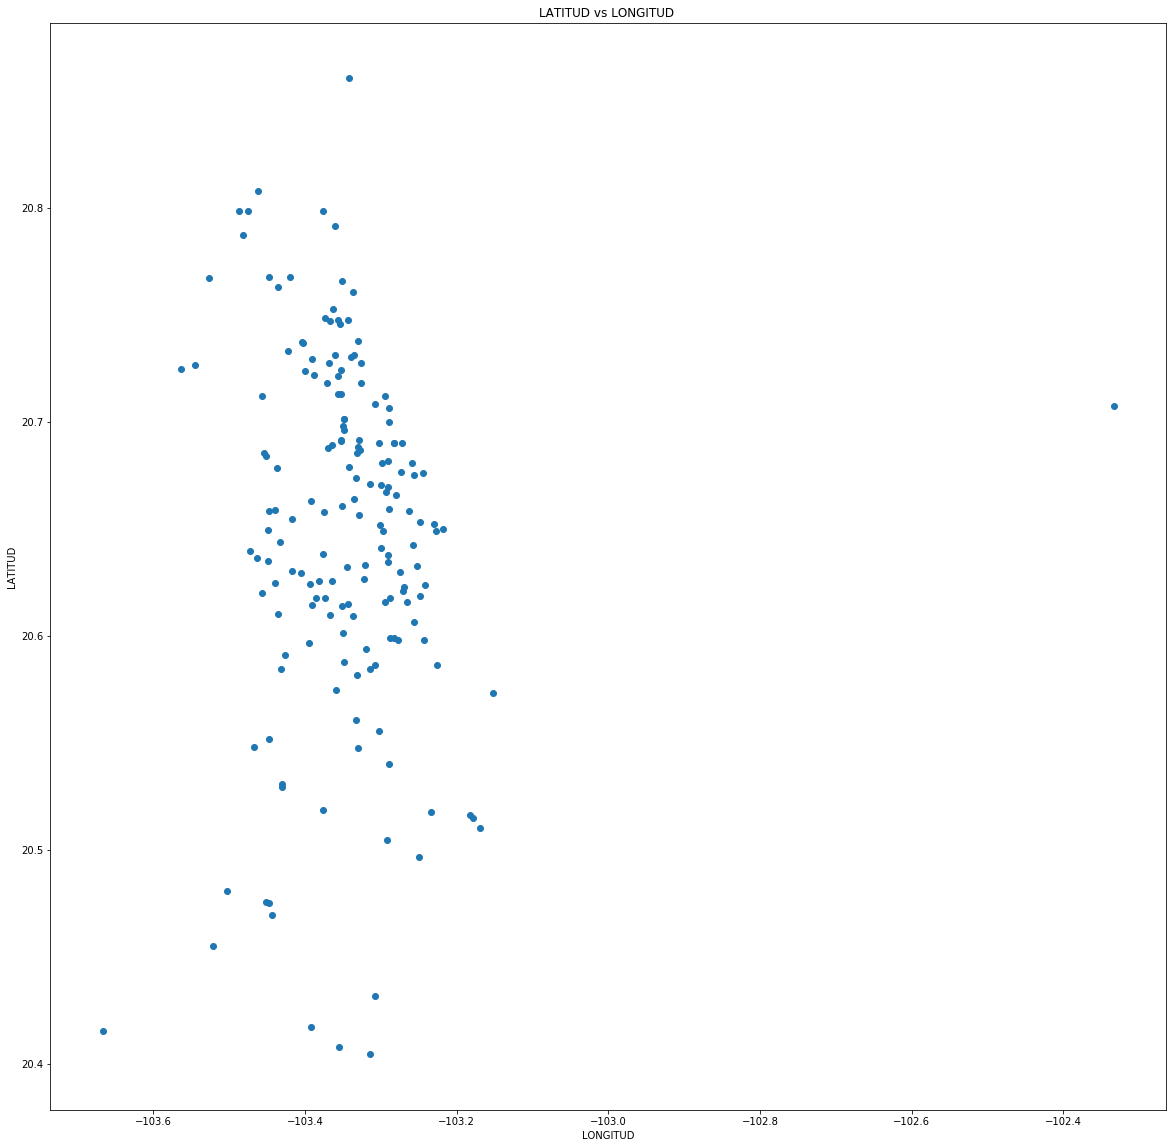

<Figure size 3600x0 with 0 Axes>

In [6]:
#Creando el plot
fig, ax = plt.subplots(figsize=(20, 20))
#Graficando Longitud es X axis axis en un mapa, Latitud es Y axis en un mapa y 
ax.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'])
#Configurando los titulos y etiquetas
ax.set_title('LATITUD vs LONGITUD ')
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')
plt.figure(figsize=(50,0))

# Implementacion Algoritmo Kmeans

In [7]:
#Juntando los datos de las localizaciones del hospital que nutren al algoritmo de Kmeans
df_LatitudHospitals = pd.DataFrame(df_Hospitals['LATITUD'])
df_LongitudHospitals = pd.DataFrame(df_Hospitals['LONGITUD'])
df_coordenadasHospitals = df_LatitudHospitals.join(df_LongitudHospitals)
print(df_coordenadasHospitals)

       LATITUD    LONGITUD
0    20.686922 -103.328075
1    20.729193 -103.390566
2    20.475000 -103.447000
3    20.713143 -103.353109
4    20.518600 -103.376000
..         ...         ...
167  20.415500 -103.666000
168  20.632400 -103.252000
169  20.683800 -103.451000
170  20.679007 -103.342022
171  20.798700 -103.487000

[172 rows x 2 columns]


In [8]:
# La documentacion de Kmeans se puede encontrar en: 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [9]:
#Se ejecutara 2 veces, la primera vez el algoritmo para conseguir los centros y la segunda vez para incluir la posicion
#en la que nos encontramos como un centro
k_means1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
k_means1.fit(df_coordenadasHospitals)
y_kmeans1 = k_means1.predict(df_coordenadasHospitals)
centers = k_means1.cluster_centers_
print(centers)

[[  20.76540133 -103.48801712]
 [  20.68833614 -103.3210839 ]
 [  20.70747016 -102.3337922 ]
 [  20.63653285 -103.42343301]
 [  20.74510941 -103.36695089]
 [  20.5214185  -103.1943752 ]
 [  20.63547477 -103.26569829]
 [  20.58727592 -103.33510075]
 [  20.41523379 -103.34197982]
 [  20.49306025 -103.48094075]]


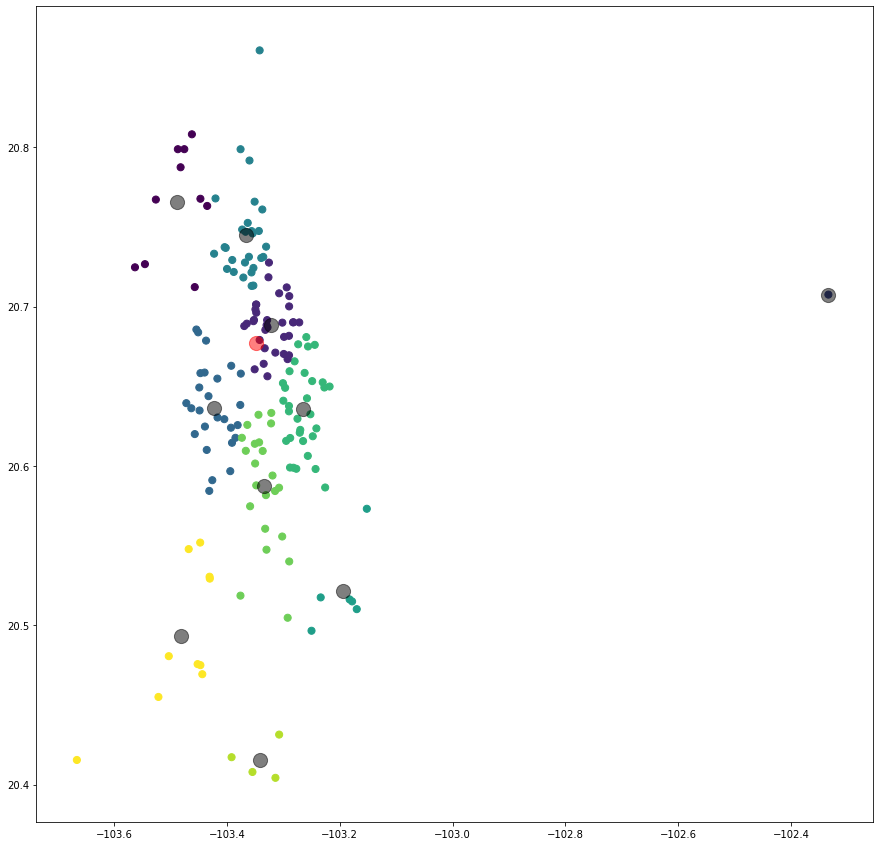

In [156]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans1, s=50, cmap='viridis')
centers1 = k_means1.cluster_centers_
plt.scatter(centers1[:, 1], centers1[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [157]:
newcenters = np.insert(centers, 0, np_my_location_arr, axis=0)
newcenters

array([[  20.677041  , -103.347745  ],
       [  20.76540133, -103.48801712],
       [  20.68833614, -103.3210839 ],
       [  20.70747016, -102.3337922 ],
       [  20.63653285, -103.42343301],
       [  20.74510941, -103.36695089],
       [  20.5214185 , -103.1943752 ],
       [  20.63547477, -103.26569829],
       [  20.58727592, -103.33510075],
       [  20.41523379, -103.34197982],
       [  20.49306025, -103.48094075]])

In [158]:
print(my_location)

(20.677041, -103.347745)


In [163]:
#https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
#https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering
k_means2 = KMeans(init=newcenters, n_clusters=11, n_init=1, max_iter=1)
k_means2.fit(df_coordenadasHospitals)
y_kmeans2 = k_means2.predict(df_coordenadasHospitals)

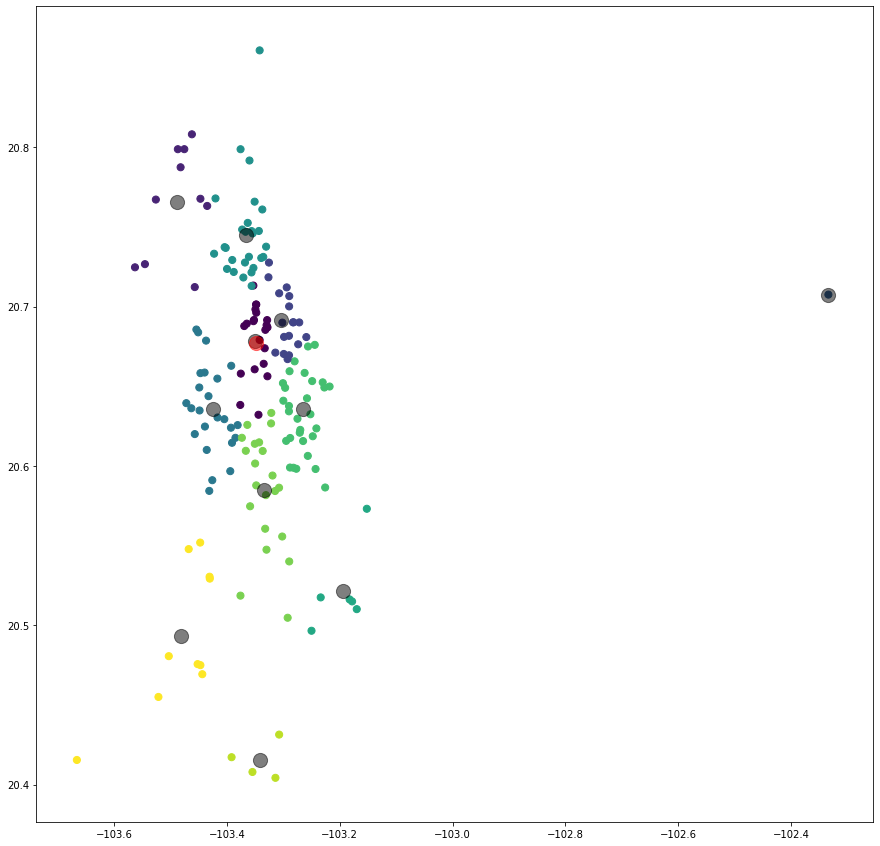

In [164]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans2, s=50, cmap='viridis')
centers2 = k_means2.cluster_centers_
plt.scatter(centers2[:, 1], centers2[:, 0], c='black', s=200, alpha=0.5);
plt.scatter(my_longuitud, my_latitude, c='red', s=200, alpha=0.5);

In [15]:
df_Outputs_KMeans = pd.DataFrame(df_Hospitals['NOMBRE DE LA UNIDAD'])
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LATITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LONGITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(data=y_kmeans2, columns=["Center_Index"]))

In [16]:
closest_cluster_center = k_means2.predict(df_my_location)

In [17]:
LocateCenters = df_Outputs_KMeans.loc[df_Outputs_KMeans["Center_Index"] == closest_cluster_center[0]] 
LocateCenters = LocateCenters.reset_index()
LocateCenters = LocateCenters.drop(['index'], axis=1)
LocateCenters = LocateCenters.drop(['Center_Index'], axis=1)

In [18]:
for i in LocateCenters.index:
    hospital_location = (LocateCenters.iat[i,1], LocateCenters.iat[i,2])
    LocateCenters.at[i, 'Tiempo_Estimado(seg)'] = bing.travelTime(my_location, hospital_location )
    LocateCenters.at[i, 'Distancia_Estimada(km)'] = bing.travelDistance(my_location, hospital_location)

In [19]:
print(my_location)

(20.677041, -103.347745)


# Evaluacion de Parametros

In [34]:
Hospitals_nearby_me = LocateCenters
Hospitals_nearby_me = LocateCenters.drop(['LATITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.drop(['LONGITUD'], axis=1)
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL DE CONSULTORIOS']))
Hospitals_nearby_me = Hospitals_nearby_me.join(pd.DataFrame(df_Hospitals['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS
0,BCO. SANGRE OBLATOS,688.0,2.912,0,4
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,820.0,4.770,15,9
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,639.0,3.306,0,2
3,CENTRO DE SALUD GUADALAJARA 3,449.0,2.067,2,0
4,CENTRO DE SALUD LOMAS DEL PARAISO,1249.0,8.243,2,0
5,CENTRO DE SALUD N°1,448.0,2.286,2,0
6,CENTRO DE SALUD RANCHO NUEVO,1107.0,8.106,2,0
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,468.0,2.185,2,0
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,573.0,2.750,2,0
9,DR. ARTURO GLEZ. GUADALAJARA # 1,683.0,2.940,2,0


In [40]:
Hospitals_nearby_me

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Tiempo,Ev_Distancia,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,688.0,2.912,0,4,0.333333,0.523810,0.000,0.375,0.227381,16.0
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,820.0,4.770,15,9,0.142857,0.190476,0.875,0.875,0.324405,8.0
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,639.0,3.306,0,2,0.523810,0.333333,0.000,0.125,0.215476,17.0
3,CENTRO DE SALUD GUADALAJARA 3,449.0,2.067,2,0,0.809524,0.904762,0.250,0.000,0.358333,6.0
4,CENTRO DE SALUD LOMAS DEL PARAISO,1249.0,8.243,2,0,0.000000,0.000000,0.250,0.000,0.025000,21.0
5,CENTRO DE SALUD N°1,448.0,2.286,2,0,0.857143,0.761905,0.250,0.000,0.358333,6.0
6,CENTRO DE SALUD RANCHO NUEVO,1107.0,8.106,2,0,0.047619,0.047619,0.250,0.000,0.044048,20.0
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,468.0,2.185,2,0,0.761905,0.857143,0.250,0.000,0.339286,7.0
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,573.0,2.750,2,0,0.571429,0.619048,0.250,0.000,0.258333,14.0
9,DR. ARTURO GLEZ. GUADALAJARA # 1,683.0,2.940,2,0,0.380952,0.476190,0.250,0.000,0.186905,19.0


In [35]:
#Preferencias Funcion de Evaluacion
#30% Tiempo de Traslado
#10% Distancia de Traslado
#10% Cantidad de Consultorios
#20% Cantidad de Medicos
#30% Ocupacion
Evaluacion_Hospitals_nearby_me = Hospitals_nearby_me
Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Tiempo_Estimado(seg)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Distancia'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['Distancia_Estimada(km)']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Consultorios'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL DE CONSULTORIOS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me['Ev_Medicos'] = Evaluacion_Hospitals_nearby_me.reset_index() \
                                                  [['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']] \
                                                  .apply(lambda x: (x.rank(method='dense') - 1) / (x.nunique() - 1) ) \
                                                  .values

Evaluacion_Hospitals_nearby_me["Ev_Tiempo"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Tiempo"])+1
Evaluacion_Hospitals_nearby_me["Ev_Distancia"] = (-1 * Evaluacion_Hospitals_nearby_me["Ev_Distancia"])+1


Evaluacion_Hospitals_nearby_me["Calificacion"] =(Evaluacion_Hospitals_nearby_me['Ev_Tiempo'] * 0.3
                                                +Evaluacion_Hospitals_nearby_me['Ev_Distancia']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

Evaluacion_Hospitals_nearby_me["Ranking"] = Evaluacion_Hospitals_nearby_me['Calificacion'].rank(method='dense', ascending = False)
        
Evaluacion_Hospitals_nearby_me.head()

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Tiempo,Ev_Distancia,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,688.0,2.912,0,4,0.333333,0.523810,0.000,0.375,0.227381,16.0
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,820.0,4.770,15,9,0.142857,0.190476,0.875,0.875,0.324405,8.0
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,639.0,3.306,0,2,0.523810,0.333333,0.000,0.125,0.215476,17.0
3,CENTRO DE SALUD GUADALAJARA 3,449.0,2.067,2,0,0.809524,0.904762,0.250,0.000,0.358333,6.0
4,CENTRO DE SALUD LOMAS DEL PARAISO,1249.0,8.243,2,0,0.000000,0.000000,0.250,0.000,0.025000,21.0


# ML and Training 

In [42]:
Evaluacion_Hospitals_2Train = Evaluacion_Hospitals_nearby_me
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Tiempo'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ev_Distancia'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Calificacion'], axis=1)
Evaluacion_Hospitals_2Train= Evaluacion_Hospitals_2Train.drop(['Ranking'], axis=1)

In [43]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos
0,BCO. SANGRE OBLATOS,688.0,2.912,0,4,0.000,0.375
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,820.0,4.770,15,9,0.875,0.875
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,639.0,3.306,0,2,0.000,0.125
3,CENTRO DE SALUD GUADALAJARA 3,449.0,2.067,2,0,0.250,0.000
4,CENTRO DE SALUD LOMAS DEL PARAISO,1249.0,8.243,2,0,0.250,0.000
5,CENTRO DE SALUD N°1,448.0,2.286,2,0,0.250,0.000
6,CENTRO DE SALUD RANCHO NUEVO,1107.0,8.106,2,0,0.250,0.000
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,468.0,2.185,2,0,0.250,0.000
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,573.0,2.750,2,0,0.250,0.000
9,DR. ARTURO GLEZ. GUADALAJARA # 1,683.0,2.940,2,0,0.250,0.000


In [44]:
Evaluacion_Hospitals_2Train["Calificacion"] =(Evaluacion_Hospitals_nearby_me['Ev_Consultorios']* 0.1
                                                +Evaluacion_Hospitals_nearby_me['Ev_Medicos']* 0.2)

Evaluacion_Hospitals_2Train["Ranking"] = Evaluacion_Hospitals_2Train['Calificacion'].rank(method='dense', ascending = False)

In [45]:
Evaluacion_Hospitals_2Train

,NOMBRE DE LA UNIDAD,Tiempo_Estimado(seg),Distancia_Estimada(km),TOTAL DE CONSULTORIOS,TOTAL MEDICOS GENERALES Y ESPECIALISTAS,Ev_Consultorios,Ev_Medicos,Calificacion,Ranking
0,BCO. SANGRE OBLATOS,688.0,2.912,0,4,0.000,0.375,0.0750,8.0
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,820.0,4.770,15,9,0.875,0.875,0.2625,2.0
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,639.0,3.306,0,2,0.000,0.125,0.0250,10.0
3,CENTRO DE SALUD GUADALAJARA 3,449.0,2.067,2,0,0.250,0.000,0.0250,10.0
4,CENTRO DE SALUD LOMAS DEL PARAISO,1249.0,8.243,2,0,0.250,0.000,0.0250,10.0
5,CENTRO DE SALUD N°1,448.0,2.286,2,0,0.250,0.000,0.0250,10.0
6,CENTRO DE SALUD RANCHO NUEVO,1107.0,8.106,2,0,0.250,0.000,0.0250,10.0
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,468.0,2.185,2,0,0.250,0.000,0.0250,10.0
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,573.0,2.750,2,0,0.250,0.000,0.0250,10.0
9,DR. ARTURO GLEZ. GUADALAJARA # 1,683.0,2.940,2,0,0.250,0.000,0.0250,10.0


### Shuffling Data

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL DE CONSULTORIOS'])
X = X.join(pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
y = Evaluacion_Hospitals_2Train['Calificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=417)

### Random Forest Classifier

In [41]:
'''
from sklearn.ensemble import RandomForestClassifier
classif = RandomForestClassifier(n_estimators=10, random_state=286, max_features=4)
classif.fit(X_train,y_train)
y_pred_RF = classif.predict(X_test)
print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

'''

In [44]:
'''
#METRICS
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
'''

2     0.215476
16    0.454167
10    0.280952
0     0.241667
20    0.295238
3     0.372619
5     0.025000
6     0.353571
Name: Calificacion, dtype: float64
[0.35780517 0.35033634 0.32609812 0.35868356 0.35519511 0.25296845
 0.25296845 0.25296845]


### Random Forest Regressor

In [ ]:
X = pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL DE CONSULTORIOS'])
X = X.join(pd.DataFrame(Evaluacion_Hospitals_2Train['TOTAL MEDICOS GENERALES Y ESPECIALISTAS']))
y = Evaluacion_Hospitals_2Train['Calificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=417)

In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

y_pred = pd.Series(y_pred)
df_y_pred = pd.DataFrame(y_pred)
df_y_test = pd.DataFrame(y_test)
df_y_test = df_y_test.reset_index()
df_y_test = df_y_test.drop(['index'], axis=1)

df_error = df_y_test.join(df_y_pred)
df_error = df_error.rename({"Calificacion": "y_test", 0: "y_pred"}, axis='columns')

for i in df_error.index:
    df_error.at[i, '% Error']  = abs(((df_error.iat[i,0] - df_error.iat[i,1])) / df_error.iat[i,0])*100

df_error["Rank_y_test"] = df_error['y_test'].rank(method='dense', ascending = False)
df_error["Rank_y_pred"] = df_error['y_pred'].rank(method='dense', ascending = False)
print(df_error)

   y_test    y_pred     % Error  Rank_y_test  Rank_y_pred
0  0.0250  0.057896  131.583333          4.0          5.0
1  0.1875  0.222286   18.552778          2.0          1.0
2  0.2000  0.182299    8.850521          1.0          3.0
3  0.0750  0.100074   33.431944          3.0          4.0
4  0.2000  0.188775    5.612500          1.0          2.0
5  0.0250  0.023358    6.568452          4.0          6.0
6  0.0250  0.023358    6.568452          4.0          6.0
7  0.0250  0.023358    6.568452          4.0          6.0


### Naive Bayes

In [ ]:
df_y_train= y_train.to_frame() 
df_y_test= y_test.to_frame()

arr_X_train = X_train.to_numpy()
arr_X_test = X_test.to_numpy()
arr_y_train = df_y_train.to_numpy()
arr_y_test = df_y_test.to_numpy()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(arr_X_train[0:254],arr_y_train)
y_pred = gnb.predict(df_y_test)
print(y_pred)

In [ ]:
y_train_pred = gnb.predict(X_test)

In [ ]:
#METRICS
from sklearn.metrics import confusion_matrix
confusion_matrix(df_y_test, y_train_pred)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(df_y_test, y_train_pred))